Choose the challanges in any order depending on your personal interests and skills. Solving one exercise will possibly need longer than one class !

## Challenge:  RNA translation

Write a script which translates a FASTA file containg RNA sequences to a FASTA file with corresponding amino 
acid sequences. 

Hint: 
- use http://siscourses.ethz.ch/python_dbiol/data/codon_table.txt to create a dictionary mapping codons to amino acids first. 
- then write a function which translates a RNA seq to an AA sequence.
- then use this funtion to solve the overall exercise.

## Challenge: Formula generator

Write a function which takes two mass values and prints all mass formulas consisting of zero or more `C`, `H` and / or `O`  where the mass is in the given range. The exact masses are: `mass_C = 12.0`, `mass_H = 1.0078250319` and `mass_O = 15.994915`.

So for example for the mass range `100.0` to `100.1` the formulas `C4H4O3`, `C5H8O2`, `C6H12O` and `C8H4` are printed.
    
Hint: you need three nested `for` loops for this to iterate over all combinations of numbers of C, H and O. The inner body computes the mass of the current combination and checks if this fits to the prescribed range. To minimize the numbers of iterations needed you can estiamte the upper bounds of the loops from the upper limit of the mass range.
    
If you solved this introduce some "pretty printing" so that a combination `8 C, 1 H, zero O` is displayed as `C8H`.

- Restrict your program to only look up carbo hydrates having the general formula $C_m(H_2O)_n$. You can  either filter the results from the existing solution or implement a new version with two nested loops for `m` and `n`.

## Challenge: Columnwise averages of a csv file

Learn about Python excptions HERE.

Write a function which checks if a given string represents a valid floating point value using exception handling.

Now write a script which computes column wise averages of a given csv file. The rows are not required to have the same length, row can be empty also. Ignore cells with invalid numbers. The size of the sheet is not known in advance. Use the file `data.csv` from the script repository for testing.

Extend your csv file such that the first column contains a random word as a group indicator followed by a random number of float numbers. 

Now compute the column wise sum grouped by the indicator from the first column. Use `data_grouped.csv` for testing.

The output should look like this:

    group0     23.79  -31.97  -14.10   21.74   41.21    7.83  -27.94   43.77  -43.09
    group1    -42.13  -23.73    0.00    0.00  -20.82  -33.25  -28.05   15.96    3.42
    group11    55.30   46.08  -29.53    0.00    0.00   -9.38
    group13    48.66  -12.12   26.33   26.20   46.43  -24.18  -26.00   38.97
    group14    49.90   13.55   38.16  -45.08   21.11   80.88   19.75    0.00   -4.31
    group15    47.08  -27.92    0.00  -17.81   26.05   10.37   45.38  -47.43   24.76
    group16    -6.95   22.93   16.48  -10.24   -7.89    2.36    0.00  -42.02  -41.60
    group18    37.89    9.22   -5.21   64.34 -117.40  -21.33   23.71  -26.46    9.93
    group19     8.70  -17.52  -20.38  -37.36  -52.66   13.72   46.30   23.23 


Lookup the `glob` Python module and extend your solution to iterate over all `csv` files in a given folder. Finally create one `csv` file where the first column is the name of the respective `csv` file followed by the column wise sums.

## Challenge "brownian motion"

A particle starts at position `(0, 0)`. Then it jumps randomly as follows:

- it draws a random angle $\phi$ from $0 \ldots 2\pi$ and a random stepsize $r$ from the range $0 \ldots 1$.
- it updates its position by doing a step of size $r$ in direction $\phi$.

Write a function which does `n` such iterations and creates two lists of `x` and `y` coordinates during these iterations.

Use `matplotlib` to plot 1000 of such iterations.

Use `matplitlib` to plot 10000 of such iterations, where every segment of 2000 iterations has a different color.

This is an example using the colors RGBKY in this order:

<img src="brownian.png">

## Challenge: Simple Numerical Computations

These exercises assume some familiarity with basic calculus. If this is not your cup of tea skip the challenge. The exercises try to give you an idea what numerical computation is about.

- First read how the bisection method works at https://en.wikipedia.org/wiki/Bisection_method#Iteration_tasks. Use this to find an approximation of $\sqrt{2}$ by looking for a zero of $f(x) = x^2 - 2$.

- Use the same function and https://en.wikipedia.org/wiki/Newton%27s_method (here $f'(x) = 2x$) to approximate $\sqrt{2}$. Print a table which shows the values for the first five iterations of both methods.

- First look at https://en.wikipedia.org/wiki/Monte_Carlo_method#/media/File:Pi_30K.gif. Now imagine you create a random point in the square. The probability that this point is also in the shown quadrant of the circle is the quotient of the areas of the two objects: $\pi/4$ for the quadrant of the circle and $1$ for the square. So if you create **many** such random points the fraction of "hits" should approxiamte $\pi/4$. Implement this to compute an approximatin of $\pi$ and compute the relative error. (To check such a "hit" use the Pythagorean theorem).

- Use the first $n$ terms of https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80 to compute an approximation of $\pi$



## Challenge: fit data to a given function

The following snippet shows how you can determine parameters of a given function to fit to given data:


[-0.09965958  1.95233482  1.38766372]


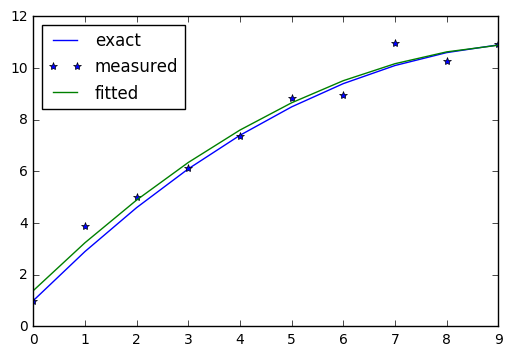

In [2]:
%matplotlib inline
import numpy as np
import scipy.optimize
import matplotlib.pyplot as pyplot

n_points = 10

x_data = np.arange(n_points)

# we generate artificial data by applying the function f(x) = -0.1 * x^2 + 2 * x + 1
exact_y_data = -.1 * x_data ** 2 + 2 * x_data + 1

# we add some noise with std dev 0.5:
measured_y_data = exact_y_data + 0.5 * np.random.randn(n_points)


def f(x, a, b, c):
    """
    argument x:  vector of values
    argument a:  first parameter to fit
    argument b:  second parameter to fit
    argument c:  third parameter to fit
    
    
    returns:  vector of y values corresponding to parameters a and b
    """
    return a * x * x + b * x + c


# we start with the assumption a = 0, b = 0 and c = 0: 
p_start = np.array([0, 0, 0])

parameters, cov_matrix = scipy.optimize.curve_fit(f, x_data, measured_y_data, p_start)
print(parameters)

pyplot.plot(x_data, exact_y_data, "b", label="exact")
pyplot.plot(x_data, measured_y_data, "b*", label="measured")
pyplot.plot(x_data, f(x_data, parameters[0], parameters[1], parameters[2]), "green", label="fitted")
pyplot.legend(loc=2)  # upper left corner
pyplot.show()

- Install numpy, scipy and matplotlib (if not done yet) and reproduce this example

Logistic growth describes the evolution of a single population in an environment of limited capacity. See https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth for details.


- Download https://siscourses.ethz.ch/python_dbiol/data/logistic_data.txt and fit the parameters $K$, $P_0$ and $r$ of the corresponding logistic function
 
   $$P(t) = \frac{K P_0 e^{rt}}{K + P_0 \left( e^{rt} - 1\right)}$$
  

- Also create the plots showing the data and the function according to the fitted parameters.

- https://siscourses.ethz.ch/python_dbiol/data/logistic_data_multi.txt contains multiple measurements in one single file. Read the data, merge values to $t$ and $P(t)$ vectors and run the fitting again.
 
- Try to automate the downloads using https://pymotw.com/3/urllib.request/index.html

## Challenge: Hangman game

Implement the Hangman-Game:

   - the computer knows a secret word
   - you have to guess letters from the word until the word is disclosed
   - after every wrong guess the computer informs you about the number of wrong guesses up to now, you loose after 10 wrong guesses
   - before you enter a guess the computer tells what you disclosed up to now by showing the secret word where a `*` is displayed for not yet guessed letters.
   
Below is a template to start. The bodies of the functions are empty, fill them up so that the final program works. The multi line strings you see serve as comments and describe how the functions should work.
   
**If you solved this here are two advanced but very good code katas !!!!**

First code kata: only keep the functions from you solutions and try to reimplement `play_game` without cheeting.

Second code kata: implement the full solution.

In [ ]:
def print_guessed(word, user_inputs):
    """
    word:  a string holding the secret word
    use_inputs:  a list of letters, collecting the user inputs
    returns: None
    
    this function prints the word letter by letter showing
    unguessed letters as "*"
    
    So the function might show "P Y * * O N" if the word is "PYTHON" and
    the user_input is ["O", "N", "P", "X", "E", "Y"]
    """
    
    
def count_guessed(word, user_inputs):
    """
    word:  a string holding the secret word
    use_inputs:  a list of letters, collecting the user inputs
    
    returns: the number of letters in "word" appearing in "user_inputs".
    """
    
    
def ask_new_guess(user_inputs):
    """
    user_inputs: list of letters already input by user
    returns: new guess from user in upper case
    
    asks until the user provids a new guess, if he repeats a
    previous guess a message is displayed and the user is
    asked again. Same happens if user inputs empty string
    or more than one character
    """
    

def play_game(secret_word):
    user_inputs = []
    guesses_left = 5

    while True: 
        
        print_guessed(secret_word, user_inputs)

        guess = ask_new_guess(user_inputs)
        user_inputs.append(guess)
        
        if guess not in secret_word:
            guesses_left -= 1
            print("wrong %d guesses left !!!" %  guesses_left)
            if guesses_left == 0:
                print("GAME OVER ! THE WORD IS", secret_word)
                break

        print()
        letters_guessed = count_guessed(secret_word, user_inputs)
        if letters_guessed == len(secret_word):
            print("YOU GOT IT !")
            break
            
import random
secret_words = ["notebook", "pythoncourse"]

secret_word = secret_words[random.randint(0, len(secret_words) - 1)].upper()

play_game(secret_word)

## Challenge: Phone number data base

Write a phone book application. If you start the program the user if asked if he wants to add an new name + phone number or if he wants to lookup an existing phone number. Store the data provided by the user in a csv file so if you restart the program the already entered data will not be lost. So the interaction with the program could look like this:

     PHONEBOOK v1.0
     ==============
        
     Already 3 entries in the phone book
     
     Please choose:
     
         1: add a new entry
         2: lookup a number
         3: show all entries
         0: exit
         
     Your choice: 1
     
     Ok, please enter a name: Julian
     And his phone number: +41 2342 2342
     
     PHONEBOOK v1.0
     ==============
     
     Already 4 entries in the phone book
     
     Please choose:
     
         1: add a new entry
         2: lookup a number
         3: show all entries
         0: exit
         
Write functions like `def main_menu(phone_book_entries):`, `def submenu_add_entry(phone_book_entries)` and `def submenu_lookup_entry(phone_book_entries)` etc.

Discard invalid input.

Suggestions: Either you use a dictionary for lookup or lists. The second approach would allow you to make a lookup which ignores special characters like spaces or `.` in a name and would ignore the case of the charaters.

If you start and the phone book is empty you can use `import os` and then `os.path.exists(..)` (use google for futher details) to check if there is already an phone book file or not.

## Challenge: Tic Tac Toe

Users should place `X` and `O` in alternating order by providing coordinates like `A2` (for the first row and second column).

A user is not allowed to overwrite a taken field and the computer should detect if `X` or `O` wins.

You can represent a 3 times 3 board by nested list like `board = [[" ", " ", " "], [" ", " ", " "], [" ", " ", " "]]` for the empty board at the beginning.

To get started:
- Write a function which asks the user to place a `X` or `O` to given coordinates until he chooses a free field. So this could be `def place(symbol, board):` which then returns the updated board.
- Write a function which prints the board nicely as `def print_board(board):`.
- Write a function which checks if a given field is free. `def is_empty(coordinates, board):`. 
- Write a function which checks if a given board represents a winning state like `def check_winner(board)` which returns `X` or `O` or `None`.

For `check_winner` you could for example check if you find a row where all values are the same, than the first value of this row would be the result. Same for colums and the two diagonals.

## Challenge: Fetch CHF exchange rates from a web service

The following snippet demonstrates how to fetch exchange rate EUR to X for a given date using a so called "web service".

In [21]:
import json
import urllib.request

url = "http://api.fixer.io/2014-01-03"
response_bytes = urllib.request.urlopen(url).read()
print(response_bytes)

b'{"base":"EUR","date":"2014-01-03","rates":{"AUD":1.5156,"BGN":1.9558,"BRL":3.2373,"CAD":1.4468,"CHF":1.2309,"CNY":8.2569,"CZK":27.525,"DKK":7.4586,"GBP":0.83045,"HKD":10.573,"HRK":7.628,"HUF":298.66,"IDR":16533.2,"ILS":4.7749,"INR":84.802,"JPY":142.46,"KRW":1438.67,"LTL":3.4528,"MXN":17.821,"MYR":4.476,"NOK":8.3585,"NZD":1.6434,"PHP":60.892,"PLN":4.1658,"RON":4.4879,"RUB":45.1393,"SEK":8.8561,"SGD":1.7244,"THB":45.022,"TRY":2.9637,"USD":1.3634,"ZAR":14.4393}}'


So the web service returns a (so called) "byte string" which looks like a dictionary (the format is called JSON). To get a "real" dictionary we can use:

In [25]:
%%capture
import pprint
data_as_dict = json.loads(str(response_bytes, "ascii"))
pprint.pprint(data_as_dict)  # nicer output than a plain print()

Take the code as it is, talking to web services is a topic on its own. Another example for a webservice is PUG to query data from Pubchem: https://pubchem.ncbi.nlm.nih.gov/pug_rest/PUG_REST_Tutorial.html

- Start with this snippet to write a function which determines the CHF to EUR exchange rate for a given year, month and day. 
- Then create a plot for the EUR to CHF exchange for the first of every month starting with 1st of january 2015 until today.
- Write a function which determines the average exchange rate for a given month. (You remenber the leap year computation exercise ?)
- Create a plot for the monthly averages.

## Challenge: A simple sorting algorithm

Implement selection sort to sort a list of numbers. This is the strategy of this algorithm:

* Start with index 0 and find the position of a minimal value in the list starting with index 0. Swap the values at both positions.
* Go on with index 1 and find the position of a minimal value in the list starting with index 1. Swap the values at both positions.
* Go on with index 2 and find the position of a minimal value in the list starting with index 2. ...
* .. and so on
        
So for a list `[2, 5, 1, 4, 3]` the result of step 0 is `[1, 5, 2, 4, 3]`, the result of step 1 is `[1, 2, 5, 4, 3]`, then `[1, 2, 3, 4, 5]`.
    
1. Reproduce and exercise this procedure with pen and paper. 
2. Start with a function `min_position(li, start_at)` which computes the position of the minimal value staring at the given position `start_at`. 
3. Then implement a funcion `step(i, li)` which perfoms step `i` for the given list (look up the position with `min_position(i + 1, li)`  then swap values at `i` and the computed position)
4. Write a loop which performs `step(0, li)` up to `step(len(li) - 1, li)`
5. Test your program for many inputs including empty lists and lists with only one element.

## Challenge: Decrypt a substituton cipher

Download the encrypted file https://siscourses.ethz.ch/python_dbiol/data/encoded.txt. The text was encoded by a "simple substituion cipher" as described at https://en.wikipedia.org/wiki/Substitution_cipher#Simple_substitution. The cipher kept space characters as space characters.

We assume that the letters in english texts ordered by their frequency are `etaonhisrldwugfycbmkpvjqxz`. So `e` is the most common character, `t` the second common character and so on. (This ordering is not fixed but depends on the text corpus used, so you will find slightly modified version on the internet).

So if a simple substituion cipher maps `e` to `a` we should see that `a` occurs most often in the encrypted text (given that the original text was in english and that the encrypted etext is long enough).

To decode the text:

 - first order the letters from the encoded text by their frequency
 - then construct a dictionary to map the characters from the given text to their most probable counterpart 
 - and finally use this to decode the text. 

The decoding will not be perfect but you should recognize english words and might refine the constructed dictionary manually to improve the result.


In [2]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND